# Optical Recognition of Handwritten Digits

In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Fijamos la semilla
np.random.seed(1)

In [3]:
# Función para leer los datos
def leerDatos(file):
    datos = pd.read_csv(file, header=None)
    X = datos.iloc[:,:-1] # Todas las columnas menos la última
    y = datos.iloc[:, -1] # Última columna
    return X, y

In [4]:
# Lectura de los datos de entrenamiento
X_train, y_train = leerDatos('datos/optdigits.tra')
# Lectura de los datos para el test
X_test, y_test = leerDatos('datos/optdigits.tes')
# Convertimos en dataframe
y_train_df = pd.DataFrame(data=y_train)
y_test_df = pd.DataFrame(data=y_test)
# Cambiamos el nombre de las columnas
X_train = X_train.add_prefix('Característica ')
X_test = X_test.add_prefix('Característica ')
y_train_df.rename(columns={64:'Dígito'}, inplace=True)
y_test_df.rename(columns={64:'Dígito'}, inplace=True)

In [5]:
# Estadísticas de los datos leídos
n_train = X_train.shape[0]
n_test = X_test.shape[0]
porcentaje_train = 100*n_train/(n_test+n_train)
porcentaje_test = 100*n_test/(n_test+n_train)
print("El número de instancias de entrenamiento es de: {}".format(X_train.shape[0]))
print("El número de instancias de test es de: {}".format(X_test.shape[0]))
print("Porcentaje de train: {}, porcentaje de test: {}".format(porcentaje_train, porcentaje_test))

El número de instancias de entrenamiento es de: 3823
El número de instancias de test es de: 1797
Porcentaje de train: 68.02491103202847, porcentaje de test: 31.97508896797153


In [6]:
# Aunque los datos están preprocesados y esperamos no tener valores perdidos, lo comprobamos:
print("Valores perdidos en el dataset de entrenamiento: {}".format(X_train.isnull().sum().sum() 
                                                                    + y_train_df.isnull().sum().sum()))
print("Valores perdidos en el dataset de test: {}".format(X_test.isnull().sum().sum() 
                                                                    + y_test_df.isnull().sum().sum()))

Valores perdidos en el dataset de entrenamiento: 0
Valores perdidos en el dataset de test: 0


In [7]:
def parseBooleano(boleano):
    if (boleano == True):
        return 'Sí'
    return 'No'

In [8]:
# Comprobación de outliers: 'Comprobamos que los valores sean enteros y estén entre 0 y 16'
print("Todos los valores de entrenamiento son enteros: {}".format(
        parseBooleano(X_train.dtypes.unique() == type(0) and y_train_df.dtypes.unique() == type(0))))
print("Todos los valores de test son enteros: {}".format(
        parseBooleano(X_test.dtypes.unique() == type(0) and y_test_df.dtypes.unique() == type(0))))
print("Todos los valores de las características de entrenamiento pertenecen al intervalo: [{},{}]".format(
        X_train.values.min(), X_train.values.max()))
print("Todos los valores de las características de test pertenecen al intervalo: [{},{}]".format(
        X_test.values.min(), X_test.values.max()))
print("Todos los valores de las etiquetas de entrenamiento pertenecen al intervalo: [{},{}]".format(
        y_train_df.values.min(), y_train_df.values.max()))
print("Todos los valores de las características de test pertenecen al intervalo: [{},{}]".format(
        y_test_df.values.min(), y_test_df.values.max()))

Todos los valores de entrenamiento son enteros: Sí
Todos los valores de test son enteros: Sí
Todos los valores de las características de entrenamiento pertenecen al intervalo: [0,16]
Todos los valores de las características de test pertenecen al intervalo: [0,16]
Todos los valores de las etiquetas de entrenamiento pertenecen al intervalo: [0,9]
Todos los valores de las características de test pertenecen al intervalo: [0,9]


In [9]:
# Instancias por clase'
print("Dataset de entrenamiento")
for i in range (len(y_train_df['Dígito'].unique())):
    print("\t {} instancias del dígito {}".format(y_train_df['Dígito'].value_counts()[i],i))
print("\n")
print("Dataset de test")
for i in range (len(y_train_df['Dígito'].unique())):
    print("\t {} instancias del dígito {}".format(y_test_df['Dígito'].value_counts()[i],i))

Dataset de entrenamiento
	 376 instancias del dígito 0
	 389 instancias del dígito 1
	 380 instancias del dígito 2
	 389 instancias del dígito 3
	 387 instancias del dígito 4
	 376 instancias del dígito 5
	 377 instancias del dígito 6
	 387 instancias del dígito 7
	 380 instancias del dígito 8
	 382 instancias del dígito 9


Dataset de test
	 178 instancias del dígito 0
	 182 instancias del dígito 1
	 177 instancias del dígito 2
	 183 instancias del dígito 3
	 181 instancias del dígito 4
	 182 instancias del dígito 5
	 181 instancias del dígito 6
	 179 instancias del dígito 7
	 174 instancias del dígito 8
	 180 instancias del dígito 9


In [10]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

preprocesado = [("escalado", StandardScaler()),
                ("PCA", PCA(n_components=0.98))]

preprocesador = Pipeline(preprocesado)
preprocesador

Pipeline(memory=None,
         steps=[('escalado',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=0.98,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

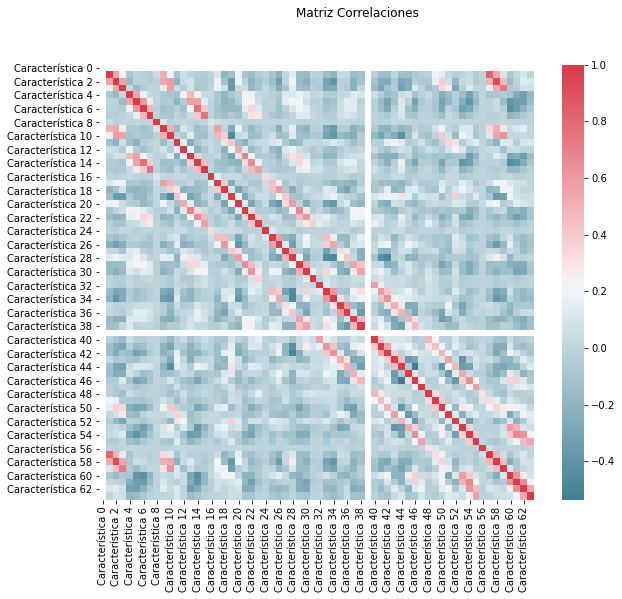

In [11]:
import seaborn as sns
def matriz_correlaciones(datos):
    f, ax = plt.subplots(figsize=(10, 8))
    corr = datos.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)
    f.suptitle('Matriz Correlaciones')
matriz_correlaciones(X_train)


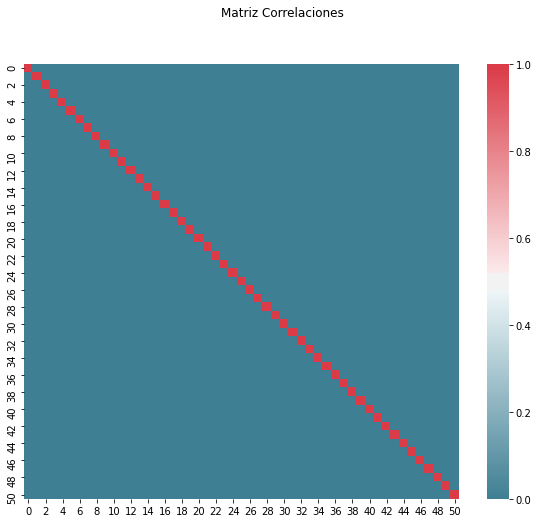

In [12]:
def matriz_correlaciones_procesados(datos):
    f, ax = plt.subplots(figsize=(10, 8))
    corr = np.corrcoef(datos.T)
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)
    f.suptitle('Matriz Correlaciones')
datos_preprocesados = preprocesador.fit_transform(X_train)
matriz_correlaciones_procesados(preprocesador.fit_transform(X_train))

In [13]:
# Convertimos en dataframe
X_train_procesados = pd.DataFrame(data=datos_preprocesados)

# Cambiamos el nombre de las columnas
X_train_procesados = X_train_procesados.add_prefix('Característica ')
X_train_procesados

,Característica 0,Característica 1,Característica 2,Característica 3,Característica 4,Característica 5,Característica 6,Característica 7,Característica 8,Característica 9,...,Característica 41,Característica 42,Característica 43,Característica 44,Característica 45,Característica 46,Característica 47,Característica 48,Característica 49,Característica 50
0,0.021179,-1.506218,4.028060,2.837064,1.121506,-1.048719,0.150893,-0.236166,-1.144235,0.216062,...,-0.313406,-0.022308,-0.704609,-0.614426,0.193583,0.413726,-0.354086,-0.099895,0.014408,0.192407
1,-0.436318,-3.001971,6.068029,2.907716,1.439000,-0.447028,0.798956,-1.762127,-1.696441,-0.287052,...,0.193374,0.331185,-0.361748,-0.245715,0.479165,-0.144064,-0.070342,0.235457,-0.080707,0.044564
2,1.363008,3.160016,-0.743226,1.395725,0.314563,0.968713,-3.625171,-2.136621,-0.731816,0.292576,...,-0.043264,0.066477,0.631655,0.469013,-0.433559,-0.596600,-0.682001,-0.114734,0.314444,-0.251355
3,4.499442,0.949555,0.433865,-1.720058,-0.517172,-2.701682,1.721142,0.417025,-1.923872,1.028773,...,0.292342,0.194547,0.711831,-0.143925,-0.060813,-0.208455,0.431938,-0.840509,0.590945,-0.367259
4,-1.199084,-3.264752,1.706263,1.130340,-1.262345,-0.225203,-1.368362,2.425412,0.360641,-0.039846,...,-0.099834,-0.220939,0.005490,0.773234,0.147666,-0.344447,0.764609,-0.213324,0.394934,-1.046653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,-0.664700,0.199198,4.083232,-1.080674,-1.692163,1.007006,-0.950205,0.498456,-0.628901,1.043451,...,-0.016979,0.147137,-0.623377,0.505707,-0.370902,0.590894,0.245106,-0.238968,0.308135,0.079277
3819,4.295936,-4.344692,-2.048086,1.937549,3.064987,0.580706,0.111593,-0.103625,-1.386905,-0.574874,...,0.662172,-0.107658,-0.301610,-0.210923,-0.262026,0.830580,0.430991,0.228538,-0.428330,-0.063009
3820,-0.360348,-3.822805,-1.171858,1.853227,-0.492848,0.137883,-1.624683,1.360577,1.415196,-1.159309,...,0.094687,0.015961,0.522414,0.131142,-0.733367,-0.170213,0.066077,-0.820419,0.291541,0.531784
3821,-1.351938,-5.283408,1.079286,3.439551,-1.187103,0.748811,-1.533931,1.703575,-0.440460,0.615567,...,0.897683,0.095846,-0.397785,-0.174518,0.571117,-0.180024,0.938540,-0.419029,-0.414359,-0.236735


In [14]:
# Estadísticas de los datos procesados
n_características = X_train_procesados.shape[1]
print("El número de características actuales es de: {}".format(n_características))


El número de características actuales es de: 51


In [15]:
# Definimos el clasificador
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

svc = (LinearSVC(penalty='l2', # Regularización Ridge (L2)
                                    multi_class='crammer_singer',
                                    loss = 'hinge'))

svc_pipe = Pipeline(steps=[('preprocesador', preprocesador),
                      ('clf', svc)])

log = (LogisticRegression(penalty='l2', # Regularización Ridge (L2)
                                    multi_class='multinomial', # Indicamos que la regresión logística es multinomial
                                    solver = 'lbfgs', # Algoritmo a utilizar en el problema de optimización, aunque es 
                                                            # el dado por defecto
                                    max_iter = 1000))

log_pipe = Pipeline(steps=[('preprocesador', preprocesador),
                      ('clf', log)])
                                    
params_log = {'clf__C': [2.0, 1.0, 0.1, 0.01, 0.001]}
params_svc = {'clf__C': [2.0, 1.0, 0.1, 0.01, 0.001]}

grid = GridSearchCV(svc_pipe, params_svc, scoring='accuracy', cv=5) # Cross-validation para elegir hiperparámetros
grid.fit(X_train, y_train)
mejor_clasificador_svc = grid.best_estimator_

grid = GridSearchCV(log_pipe, params_log, scoring='accuracy', cv=5) # Cross-validation para elegir hiperparámetros
grid.fit(X_train, y_train)
mejor_clasificador_log = grid.best_estimator_


In [16]:
if(mejor_clasificador_log.score(X_train, y_train) < mejor_clasificador_svc.score(X_train, y_train)):
    clasificador = mejor_clasificador_svc
else:
    clasificador = mejor_clasificador_log
parametros = clasificador['clf'].get_params
accuracy_log = mejor_clasificador_log.score(X_train, y_train)
accuracy_svc = mejor_clasificador_svc.score(X_train, y_train)
print('accuracy_svc: {}, acuraccy_log: {}'.format(accuracy_svc, accuracy_log))
print("Parámetros del clasificador: {}".format(parametros))

accuracy_svc: 0.985613392623594, acuraccy_log: 0.9793356003138897
Parámetros del clasificador: <bound method BaseEstimator.get_params of LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000,
          multi_class='crammer_singer', penalty='l2', random_state=None,
          tol=0.0001, verbose=0)>


In [17]:
# Preprocessing of training data, fit model 
clasificador.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocesador',
                 Pipeline(memory=None,
                          steps=[('escalado',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True)),
                                 ('PCA',
                                  PCA(copy=True, iterated_power='auto',
                                      n_components=0.98, random_state=None,
                                      svd_solver='auto', tol=0.0,
                                      whiten=False))],
                          verbose=False)),
                ('clf',
                 LinearSVC(C=0.1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000,
                           multi_class='crammer_singer', penalty='l2',
                           random_state=None, tol=0.0001, verbose=0))],
         

In [18]:
# Predecimos los valores de salida del test
y_predict = clasificador.predict(X_test)
y_predict

array([0, 1, 2, ..., 8, 9, 8])

In [19]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test, y_predict)

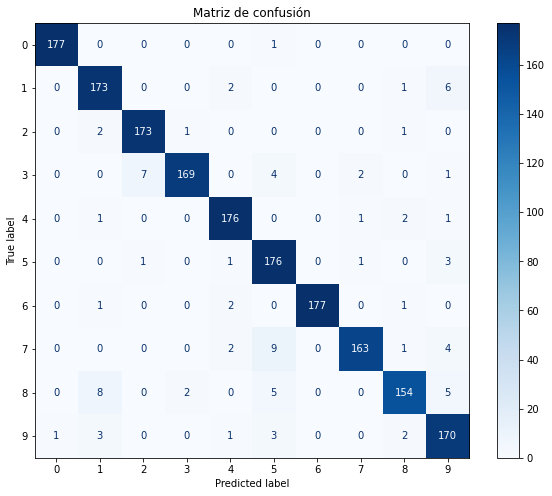

In [20]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Matriz de confusión")
matriz_confusion_no_normalizada = plot_confusion_matrix(clasificador, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 ax = ax,
                                 values_format='.3g')

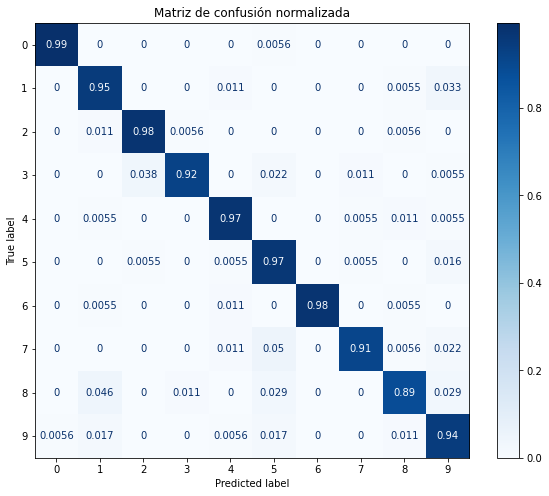

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Matriz de confusión normalizada")
matriz_confusion_normalizada = plot_confusion_matrix(clasificador, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 ax = ax)

In [22]:
# Accuracy de la matriz de confusión directamente
def accuracy(m):
    verdaderos = 0
    totales = 0
    for i in range(m.shape[0]):
        verdaderos += m[i][i]
    totales = sum(sum(x) for x in m)
    return verdaderos/totales

In [23]:
print("E_in: {}".format(1 - clasificador.score(X_train, y_train)))
print("E_out: {}".format(1 - clasificador.score(X_test, y_test)))

E_in: 0.014386607376405958
E_out: 0.04952698942682243
